# 冲顶大会辅助

In [1]:
# 导入所需要的包
from matplotlib import pyplot as plt
from PIL import Image
from plotImg import markRect
from plotImg import Box2Rect
from plotImg import baidu_OCR
import numpy as np
from PIL import ImageGrab
import webbrowser
from urllib import urlencode

from solve_utils import words_count
from solve_utils import search_count
import io
from aip import AipOcr


In [2]:
# 读取测试图片
testImage = ImageGrab.grab((1, 46, 690, 1288))

In [22]:
size = testImage.size #size[0] 宽 750  size[1] 高
scaleSize = size[0] / 750.0

questionBox = [50,330,655,190] # 40,235,675,285
questionSubImage = testImage.crop(Box2Rect(questionBox, scaleSize))

answerABox = [120,545,500,98] # x,y,w,h 105,536,530,89
answerASubImage = testImage.crop(Box2Rect(answerABox, scaleSize))

answerBBox = [120,answerABox[1] + 20 + answerABox[3],answerABox[2],answerABox[3]]
answerBSubImage = testImage.crop(Box2Rect(answerBBox, scaleSize))

answerCBox = [120,answerABox[1] + (20 + answerABox[3]) * 2,answerABox[2],answerABox[3]]
answerCSubImage = testImage.crop(Box2Rect(answerCBox, scaleSize))


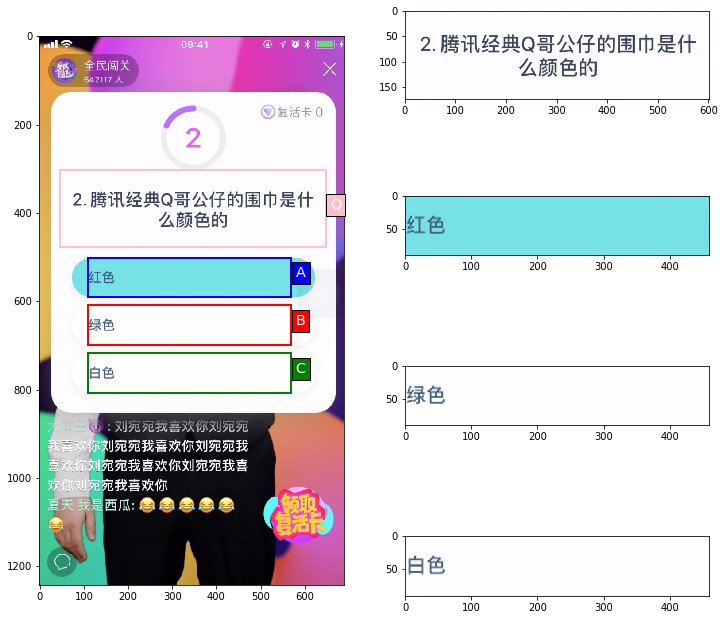

In [23]:
# 显示出来结果
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(testImage)
current_axis = plt.gca()

markRect(questionBox, scaleSize, "Q", "Pink", current_axis, plt)

markRect(answerABox, scaleSize, "A", "blue", current_axis, plt)
markRect(answerBBox, scaleSize, "B", "Red", current_axis, plt)
markRect(answerCBox, scaleSize, "C", "Green", current_axis, plt)

plt.subplot(422)
plt.imshow(questionSubImage)

plt.subplot(424)
plt.imshow(answerASubImage)

plt.subplot(426)
plt.imshow(answerBSubImage)

plt.subplot(428)
plt.imshow(answerCSubImage)


In [5]:
questionText = baidu_OCR(questionSubImage).encode('utf-8')
print questionText

2.腾讯经典Q哥公仔的围巾是什么颜色的


In [18]:
APP_ID = '10684844'
API_KEY = '07DwZEoco2COSLBgbEBlq5eU'
SECRET_KEY = '1yO6Of2ZcHiXa7d5Nm2EbTqlS5hQHNCv'
client = AipOcr(APP_ID, API_KEY, SECRET_KEY)
imgByteArr = io.BytesIO()
questionSubImage.save(imgByteArr, format='PNG')
result = client.basicGeneral(imgByteArr.getvalue())
print result

{u'error_code': 17, u'error_msg': u'Open api daily request limit reached'}


In [4]:
# 百度OCR
questionText = baidu_OCR(questionSubImage).encode('utf-8')
#if len(questionText) > 2:
#    questionText = questionText[1:]
print questionText

answers = []
answerAText = baidu_OCR(answerASubImage)
answers.append(answerAText)
print answerAText

answerBText = baidu_OCR(answerBSubImage)
answers.append(answerBText)
print answerBText

answerCText = baidu_OCR(answerCSubImage)
answers.append(answerCText)
print answerCText

11.1906年的今天“汉语拼音之父”出生了,他是谁?
周有光
王力
杨树达


In [7]:
webbrowser.open('https://baidu.com/s?' + urlencode({"wd":questionText}))

True

In [7]:
sc = words_count(questionText,answers)
print "|"
print answers[find_min(sc)].encode('utf-8') + " 在答案中出现的最少"
print answers[find_max(sc)].encode('utf-8') + " 在答案中出现的最多"
print "|"

搜索问题得到的答案中各个选项匹配的次数:
周有光 ---> 27
王力 ---> 0
杨树达 ---> 0
|
杨树达 在答案中出现的最少
周有光 在答案中出现的最多
|


In [8]:
sc = search_count(questionText,answers)
print "|"
print answers[find_min(sc)].encode('utf-8') + " 的结果最少"
print answers[find_max(sc)].encode('utf-8') + " 的结果最多"
print "|"

问题和答案一起搜各个选择得到的结果：
周有光 ---> 12200
王力 ---> 5790
杨树达 ---> 1450
|
杨树达 的结果最少
周有光 的结果最多
|
